In [19]:
#importing necessary librries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 
from scipy.stats import skew
sns.set()
%matplotlib inline

In [20]:
#importing dataframe
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [24]:
# Now for Numerical Features and Categorical Features
nf = data.select_dtypes(include=[np.number]).columns
cf = data.select_dtypes(include=[np.object]).columns
nf


<ipython-input-24-abe98fd48f58>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cf = data.select_dtypes(include=[np.object]).columns


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [25]:
cf

Index(['Sex'], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

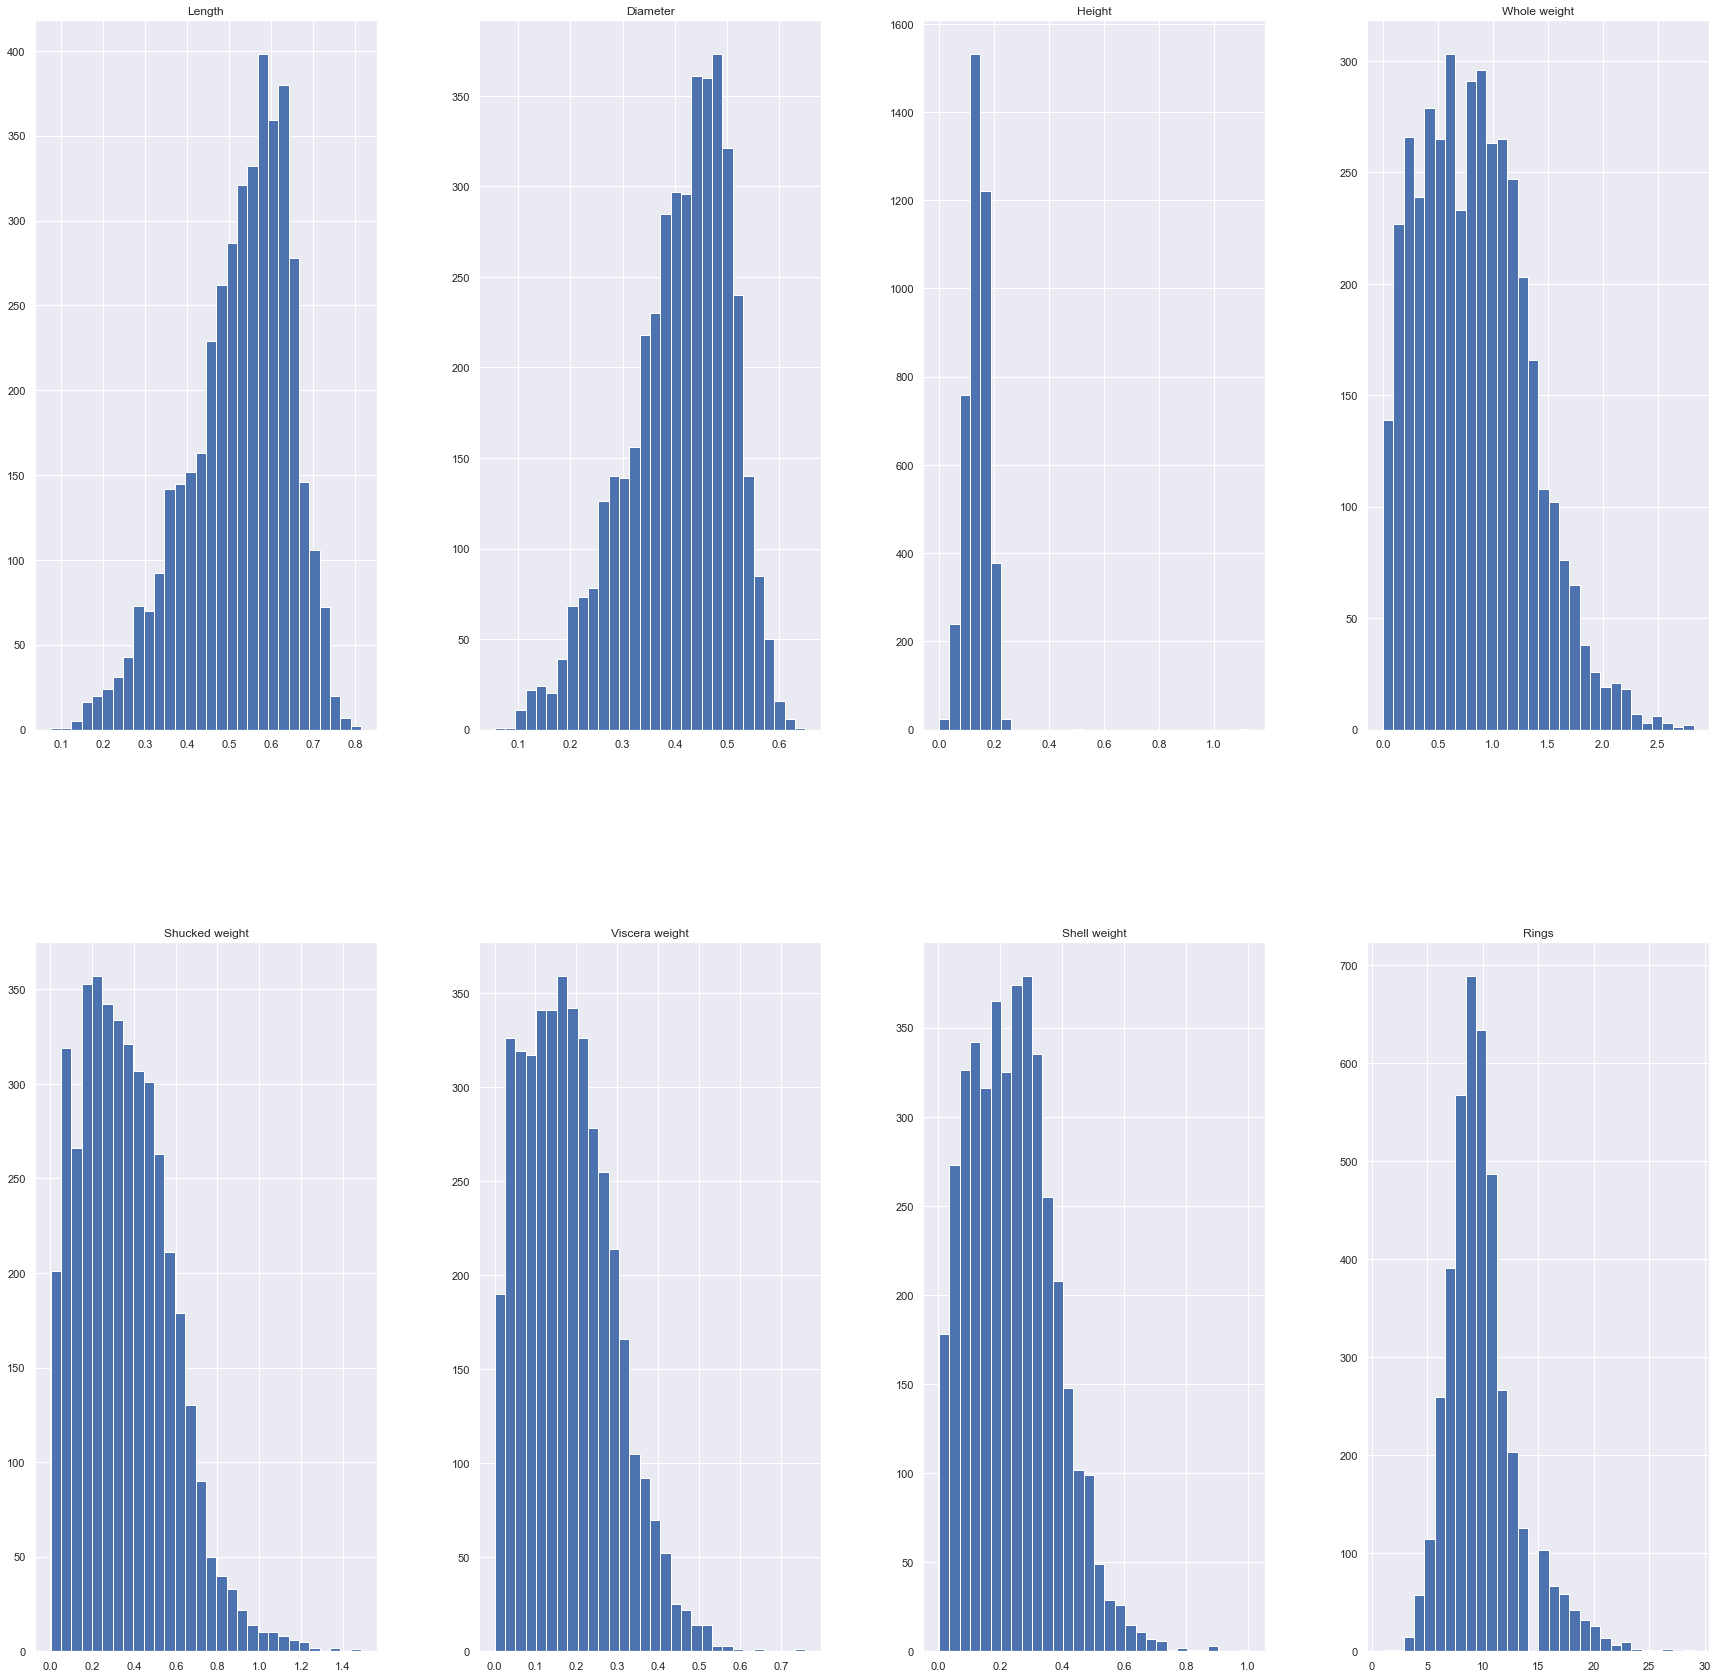

In [28]:
# To see the neumeric data distribution we need to plot the histogram hence,
data.hist(figsize=(30,30), grid = True, layout = (2,4), bins = 30)

# Looking at the above graph the data seems to be skewed hence there is need to check the skewness

In [29]:
skew_list = skew(data[nf],nan_policy='omit') 
skew_list_data = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [30]:
skew_list_data.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


# normally Distributed Data, Skewness should be greater than 0

In [35]:
#checking the missing values using isnull
mv_data= data.isnull().sum().sort_values(ascending = False)
pmv_data = (mv_data/len(data)) * 100
missing_data = pd.concat([mv_data,pmv_data], axis = 1, keys = ['Missing Values','% Missing'])
missing_data

,Missing Values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [37]:
# now we need to do the target column anaylisis 
print("Value Count of Rings Column")
print(data.Rings.value_counts())
print("\nPercentage of Rings Column")
print(data.Rings.value_counts(normalize = True))


Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
26    0.000239
29    0.000239
25    0.000239
1     0.000239
2     0.000239
Name: Rings, dtype: float64


In [38]:
print(len(data.Rings.unique()))

28


<AxesSubplot:xlabel='Sex', ylabel='count'>

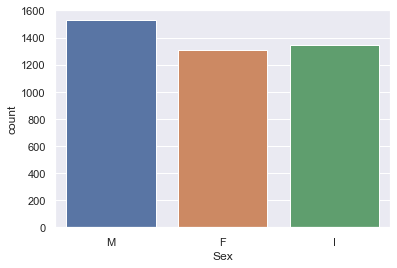

In [39]:
# Data visualization
sns.countplot(x='Sex', data = data)

# The above graph is for the Sex Count of Abalone, M - Male, F - Female, I - Infant

In [41]:
#printing the sex ratio
print("\nSex Count in Percentage")
print(data.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(data.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [43]:
data['Age'] = data['Rings'] + 1.5
data['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

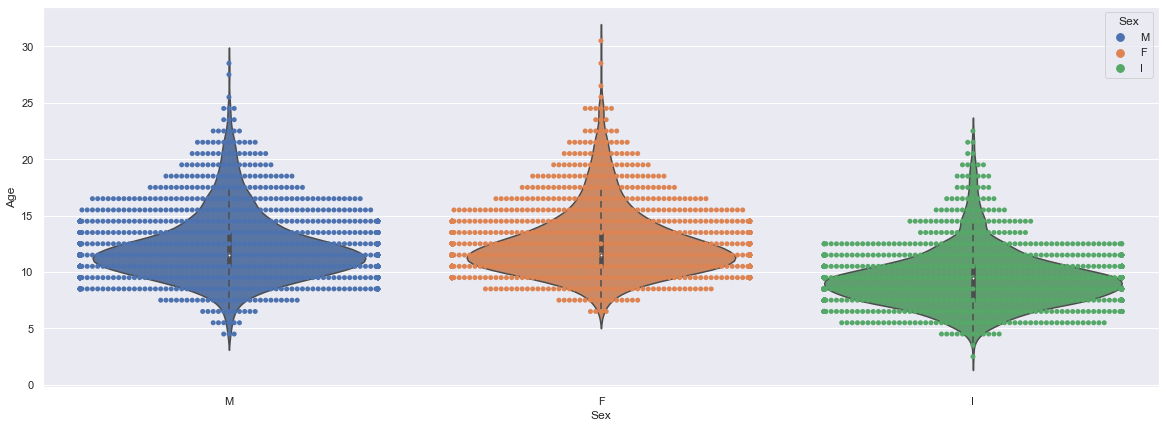

In [44]:
# Now plotting the swarmplot and violin plot for the sex and age visulization
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = data)

In [45]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [46]:
# now we need to encode the catogorial data for the model using labelencoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'].tolist())

In [49]:
#one hot encoder
transformed_sex_feature = OneHotEncoder().fit_transform(data['Sex'].values.reshape(-1,1)).toarray()
data_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
data = pd.concat([data, data_sex_encoded], axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0,0.0,1.0,0.0


# Splitting the Data model into Train_Test_Split

In [50]:
Xtrain = data.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = data['Rings']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [52]:
logreg = LogisticRegression() #for Logistic Regression
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)#prediction of training set
result_acc = accuracy_score(Y_test,Y_pred)# for accuracy score

F:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
result_acc

0.26033357505438726

# For both label and one hot encoding the accuracy score is 26%

In [54]:
# we need to create new target variable 
data['newRings'] = np.where(data['Rings'] > 10,1,0)

In [60]:
Xtrain = data.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = data['newRings']# for learning features and predicting features
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.7715736040609137

# To handle multi-class classfication we can use SVM MODEL to handle the multi-class and multi lablel classification

In [64]:
from sklearn import svm
Xtrain = data.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = data['Rings']
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)


In [65]:
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) #Creating object of SvM
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)#prediction of training set
result_acc = accuracy_score(Y_test,Y_pred)#for accuracy score 

In [66]:
result_acc

0.37128353879622916

# As we can clearly see that the accuracy score with svm is increased to 37% from 26%. Now lets try with the tweaking model learning process if the score increases

In [67]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 
result_acc

0.38143582306018853

# By tweaking learning process the accuracy score has been increased again to 38%
lets try to reduce the classes and try 

In [68]:
new_data= data.copy()#creating the new data frame by reducing the classes to check if there is any increase in the accuracy score 

In [70]:
new_data['newRings_1'] = np.where(data['Rings'] <= 8,1,0)
new_data['newRings_2'] = np.where(((data['Rings'] > 8) & (data['Rings'] <= 10)), 2,0)
new_data['newRings_3'] = np.where(data['Rings'] > 10,3,0)

In [71]:
new_data['newRings'] = new_data['newRings_1'] + new_data['newRings_2'] + new_data['newRings_3']

In [73]:
#predicting the features
Xtrain = new_data.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_data['newRings']
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [74]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 
result_acc

0.9840464104423495

# Hence we can observe that we havent removed outliers but using the SVM and reducing the classes we can see that the accuracy score has been achieved to 98%